Standaryzacja tylko kolumny "T"  

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import scipy as sp

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ZTSI.csv')

In [ ]:
labels = df[["Q","R","S","T"]]#"Q","R","S","T"
labels

,Q,R,S,T
0,0.006,0.251,0.743,4190.292
1,0.000,0.001,0.999,6014.482
2,0.060,0.288,0.652,4200.343
3,0.000,0.000,1.000,19121.405
4,0.000,0.000,1.000,1978.472
...,...,...,...,...
2994,0.017,0.148,0.835,6489.224
2995,0.000,0.000,1.000,2450.382
2996,0.000,0.000,1.000,2723.639
2997,0.000,0.000,1.000,3792.123


In [ ]:
features=df[["A", "B","C","D","E","F","P"]]
features

,A,B,C,D,E,F,P
0,7,37.281,22.982,27.478,0.535,1.007,0.0
1,4,44.585,24.704,37.649,0.488,1.301,0.0
2,6,44.580,28.450,28.923,0.774,0.908,0.0
3,5,45.122,18.719,41.147,1.280,1.378,0.0
4,3,34.953,19.789,25.372,0.917,0.605,0.0
...,...,...,...,...,...,...,...
2994,5,27.496,20.419,24.558,1.006,0.952,0.0
2995,4,36.921,16.461,29.046,0.410,1.226,0.0
2996,3,25.185,14.926,23.514,0.886,0.905,0.0
2997,3,41.186,22.007,32.554,0.702,1.344,0.0


In [ ]:
features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.15, random_state=42
)

In [ ]:
means = np.mean(features_train, axis=0)
std_devs = np.std(features_train, axis=0)

features_train_s_m = (features_train - means) / std_devs
features_test_s_m = (features_test - means) / std_devs


means_t = np.mean(labels_train["T"], axis=0)
std_devs_t = np.std(labels_train["T"], axis=0)

labels_train_s_m_t = (labels_train["T"] - means_t) / std_devs_t
labels_test_s_m_t = (labels_test["T"] - means_t) / std_devs_t

In [ ]:
features_train_s_m["P"] = features_train_s_m['P'].fillna(0)
features_test_s_m["P"] = features_test_s_m['P'].fillna(0)

In [ ]:
labels_train["T"] = labels_train_s_m_t
labels_test["T"] = labels_test_s_m_t

In [ ]:
labels_train

,Q,R,S,T
170,0.000,0.000,1.000,-0.016566
2699,0.002,0.592,0.406,0.083978
43,0.000,0.000,1.000,-0.121800
87,0.221,0.065,0.714,0.063946
1411,0.000,0.000,1.000,0.183191
...,...,...,...,...
1638,0.000,0.000,1.000,-0.241527
1095,0.000,0.000,1.000,-0.312527
1130,0.000,0.000,1.000,-0.243440
1294,0.343,0.020,0.636,0.168931


In [ ]:
labels_test

,Q,R,S,T
1376,0.000,0.000,1.000,-0.181638
932,0.008,0.340,0.652,-0.123873
144,0.006,0.290,0.704,-0.074532
1752,0.006,0.528,0.465,0.021712
51,0.019,0.000,0.981,-0.271270
...,...,...,...,...
2933,0.000,0.328,0.671,-0.084416
183,0.000,0.000,1.000,-0.287744
831,0.149,0.283,0.568,0.032086
188,0.006,0.476,0.518,-0.190621


In [ ]:
features_train_s_m_t = torch.FloatTensor(features_train_s_m.to_numpy())
labels_train = torch.FloatTensor(labels_train.to_numpy())
features_test_s_m_t = torch.FloatTensor(features_test_s_m.to_numpy())
labels_test = torch.FloatTensor(labels_test.to_numpy())

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(7, 16)
        self.fc2 = nn.Linear(16, 7)
        self.fc3 = nn.Linear(7, 4)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
model = NeuralNetwork()

In [ ]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)

In [ ]:
num_epochs = 1000
train_losses = []

for epoch in range(num_epochs):
    model.train()

    outputs = model(features_train_s_m_t)
    loss = criterion(outputs, labels_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_losses.append(loss.detach().numpy())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/1000], Loss: 0.2831
Epoch [20/1000], Loss: 0.2627
Epoch [30/1000], Loss: 0.2486
Epoch [40/1000], Loss: 0.2331
Epoch [50/1000], Loss: 0.2184
Epoch [60/1000], Loss: 0.2054
Epoch [70/1000], Loss: 0.1921
Epoch [80/1000], Loss: 0.1772
Epoch [90/1000], Loss: 0.1612
Epoch [100/1000], Loss: 0.1448
Epoch [110/1000], Loss: 0.1291
Epoch [120/1000], Loss: 0.1141
Epoch [130/1000], Loss: 0.1011
Epoch [140/1000], Loss: 0.0899
Epoch [150/1000], Loss: 0.0799
Epoch [160/1000], Loss: 0.0709
Epoch [170/1000], Loss: 0.0629
Epoch [180/1000], Loss: 0.0551
Epoch [190/1000], Loss: 0.0489
Epoch [200/1000], Loss: 0.0430
Epoch [210/1000], Loss: 0.0382
Epoch [220/1000], Loss: 0.0335
Epoch [230/1000], Loss: 0.0301
Epoch [240/1000], Loss: 0.0271
Epoch [250/1000], Loss: 0.0246
Epoch [260/1000], Loss: 0.0228
Epoch [270/1000], Loss: 0.0213
Epoch [280/1000], Loss: 0.0205
Epoch [290/1000], Loss: 0.0189
Epoch [300/1000], Loss: 0.0179
Epoch [310/1000], Loss: 0.0171
Epoch [320/1000], Loss: 0.0173
Epoch [330/1000],

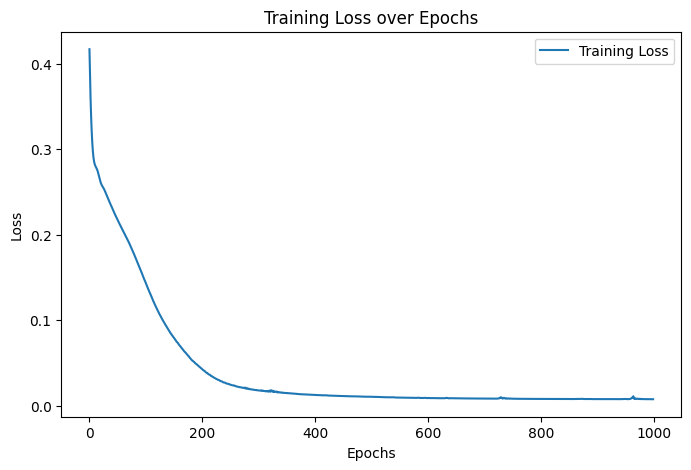

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

In [ ]:
model.eval()
with torch.no_grad():
    test_outputs = model(features_test_s_m_t)
    test_loss = criterion(test_outputs, labels_test)
    print(f'Test Loss: {test_loss.item():.4f}')

Test Loss: 0.3926


In [ ]:
X_test_np = features_test_s_m_t.numpy()
y_test_np = labels_test.numpy()
predicted_np = test_outputs.numpy()

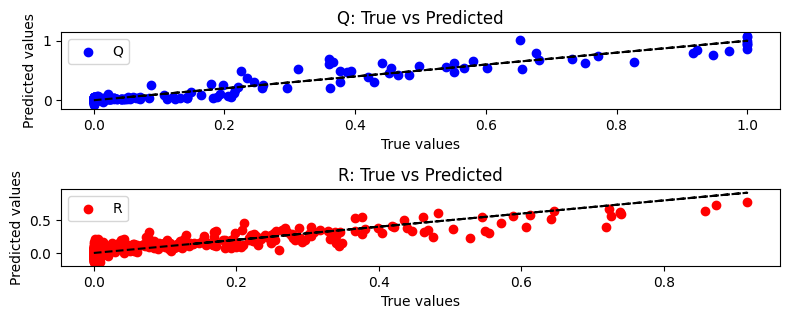

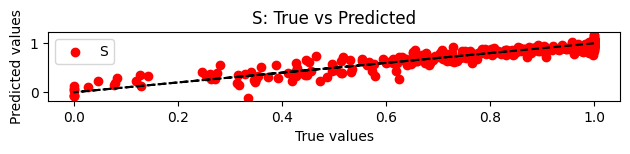

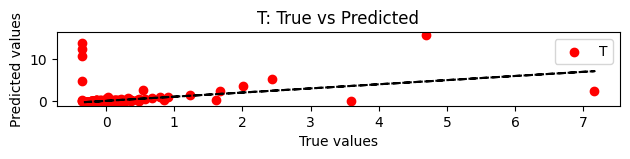

In [ ]:
plt.figure(figsize=(8, 6))

plt.subplot(4, 1, 1)
plt.scatter(y_test_np[:, 0], predicted_np[:, 0], color='blue', label='Q')
plt.plot(y_test_np[:, 0], y_test_np[:, 0], color='black', linestyle='--')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Q: True vs Predicted')
plt.legend()

plt.subplot(4, 1, 2)
plt.scatter(y_test_np[:, 1], predicted_np[:, 1], color='red', label='R')
plt.plot(y_test_np[:, 1], y_test_np[:, 1], color='black', linestyle='--')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('R: True vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()

plt.subplot(4, 1, 3)
plt.scatter(y_test_np[:, 2], predicted_np[:, 2], color='red', label='S')
plt.plot(y_test_np[:, 2], y_test_np[:, 2], color='black', linestyle='--')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('S: True vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()

plt.subplot(4, 1, 4)
plt.scatter(y_test_np[:, 3], predicted_np[:, 3], color='red', label='T')
plt.plot(y_test_np[:, 3], y_test_np[:, 3], color='black', linestyle='--')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('T: True vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
model.eval()
with torch.no_grad():
    predicted = model(features_test_s_m_t)


    r_squared_values = [r2_score(labels_test[:, i].numpy(), predicted[:, i].numpy()) for i in range(4)]

    print(r_squared_values)
    average_r_squared = np.mean(r_squared_values)

    print(f"R-squared: {average_r_squared}")

[0.930395963622111, 0.786638058859918, 0.886313594685429, -4.763574398532462]
R-squared: -0.5400566953412511
